In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import urllib.request

# URL of the dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# Read the data from the URL
with urllib.request.urlopen(url) as response:
    data = pd.read_csv(response)

# Split the data into features (X) and the target variable (y)
X = data['Hours'].values.reshape(-1, 1)
y = data['Scores'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the scores for the test data
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) to evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Predict the percentage for a student who studies for 9.25 hours per day
hours_studied = np.array([[9.25]])
predicted_score = model.predict(hours_studied)
print(f"Predicted Score for 9.25 hours/day of study: {predicted_score[0]}")

Mean Absolute Error: 4.183859899002975
Predicted Score for 9.25 hours/day of study: 93.69173248737538


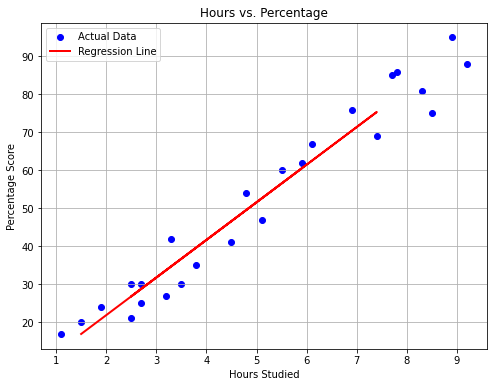

In [4]:
import matplotlib.pyplot as plt
# Create a scatter plot of hours vs. percentage
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs. Percentage')
plt.legend()
plt.grid(True)
plt.show()